## Importing Necessary Libreries

In [1]:
import textblob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from wordcloud import WordCloud
%matplotlib inline

In [2]:
import spacy
from spacy import schemas
from spacy import Dict
from spacy import displacy
from spacy.lang.en.stop_words import  STOP_WORDS
import string
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
import re
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to C:\Users\Siddhartha-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Siddhartha-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
nlp = spacy.load("en_core_web_sm")

## Import Data

In [5]:
data = pd.read_csv("./Elon_musk.csv",encoding="latin-1")
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
data=data.drop(columns="Unnamed: 0",axis=1)
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [7]:
import re

## Punctuations

In [8]:
punct = string.punctuation

In [9]:
print(punct)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


## Stopwords

In [10]:
stopwords=list(STOP_WORDS)
stopwords

['less',
 'will',
 'either',
 'not',
 'are',
 'it',
 'one',
 'several',
 'nevertheless',
 'have',
 'n‘t',
 'quite',
 'him',
 'rather',
 'toward',
 'put',
 'formerly',
 'without',
 'whereby',
 "'re",
 'everywhere',
 'until',
 'however',
 'somehow',
 'them',
 'indeed',
 'whence',
 'because',
 'to',
 'whose',
 'itself',
 'that',
 'else',
 'take',
 'behind',
 '‘re',
 'about',
 'keep',
 'can',
 'its',
 'amount',
 'becomes',
 'few',
 'herein',
 'third',
 'he',
 "'s",
 'show',
 'through',
 'beside',
 'some',
 'might',
 'elsewhere',
 'six',
 'whether',
 'once',
 'fifty',
 'everyone',
 'both',
 'enough',
 'twelve',
 'this',
 'every',
 'only',
 'anything',
 'nine',
 'towards',
 'made',
 '’m',
 're',
 'with',
 'these',
 'been',
 'is',
 'per',
 'always',
 'move',
 'sometime',
 'alone',
 'together',
 'should',
 'during',
 'am',
 'really',
 'well',
 'while',
 "'ve",
 'why',
 'two',
 'must',
 'into',
 'anyhow',
 'herself',
 'do',
 'namely',
 'seems',
 'done',
 'noone',
 'across',
 'see',
 'under',
 '

# Text Preprocessing

## 1. Removing Mentions and Hashtags and Hyperlinks

In [11]:
# Clean The Data
def cleantext(text):
    text = re.sub(r"@[A-Za-z]+", "", text) # Remove Mentions
    text = re.sub(r"[0-9]+", " ", text) # Remove Numbers
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    text=text.lower()
    return text
# Clean The Text
data["Text"] = data["Text"].apply(cleantext)
data.head()

,Text
0,im an alien
1,_aa_carmack ray tracing on cyberpunk with hdr ...
2,great interview!
3,doge is underestimated
4,congratulations tesla china for amazing execu...


## 2. Segnentation and Lemmatisation and Normalisation

In [12]:
cleaned_data = []

#ps = PorterStemmer()
lz = WordNetLemmatizer()

for i in range(0,len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['Text'][i])
    review = review.lower()
    review = review.split()
    review = [lz.lemmatize(word) for word in review if word not in STOP_WORDS]
    review = ' '.join(review)
    cleaned_data.append(review)
    

In [13]:
df=pd.DataFrame(cleaned_data)
df=df.rename({0:"Text"},axis=1)
df

,Text
0,m alien
1,aa carmack ray tracing cyberpunk hdr level tried
2,great interview
3,doge underestimated
4,congratulation tesla china amazing execution year
...,...
1994,true sound surreal negative propaganda amp eas...
1995,sure read ur term amp condition clicking accept
1996,samwise gamgee
1997,altho dumb dumber u f u f


## Creating a Word Cloud

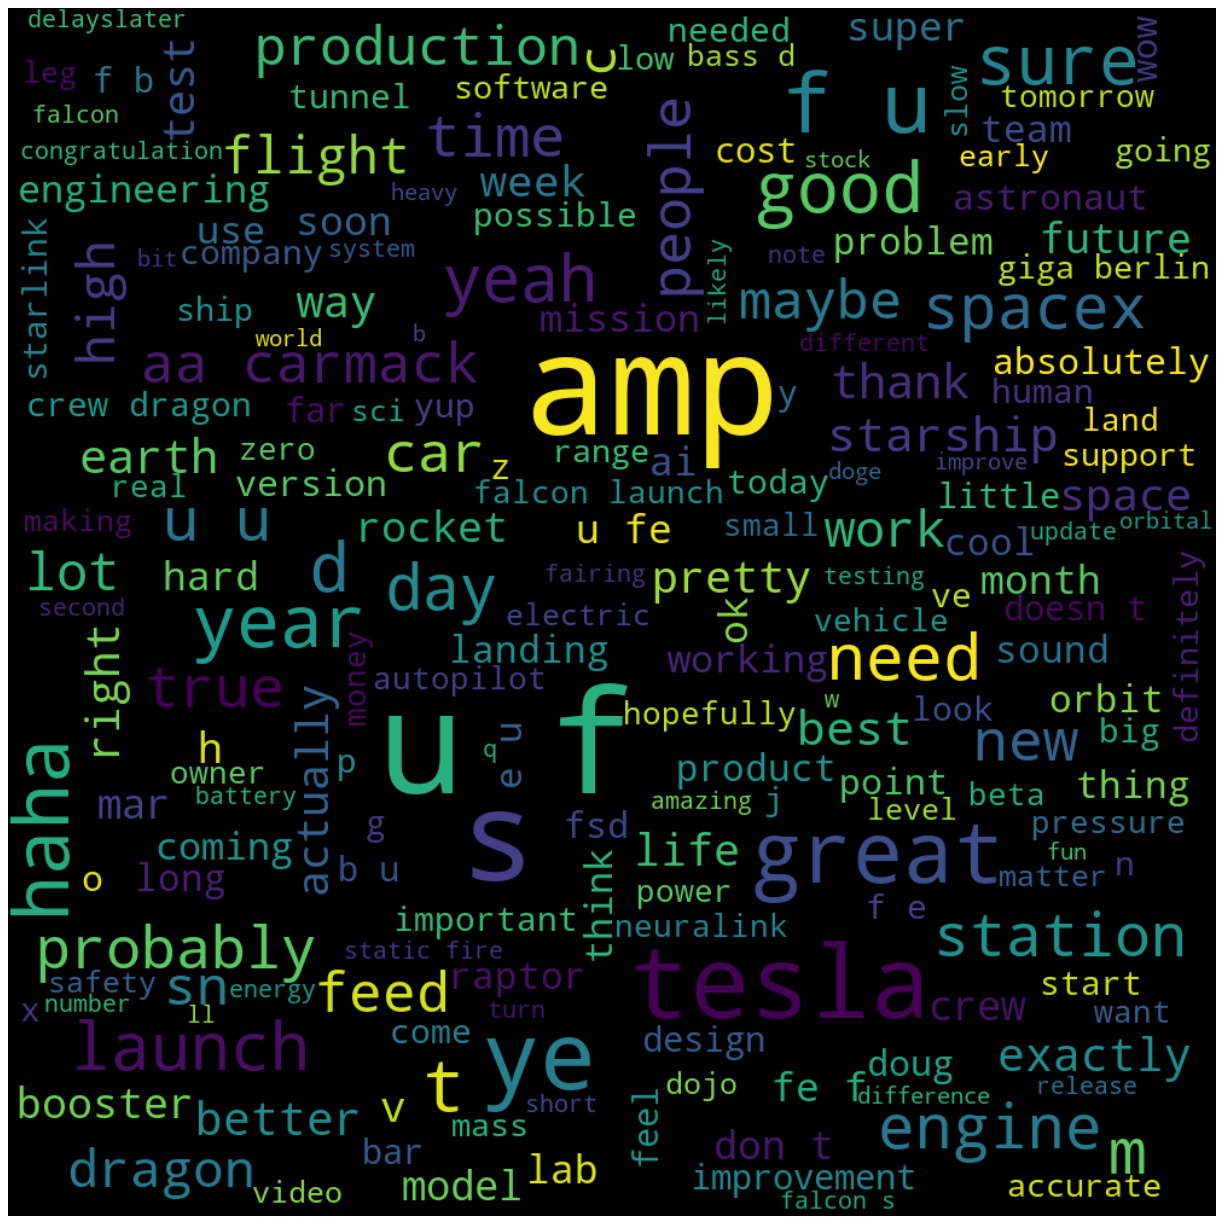

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([twts for twts in df["Text"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

## What is Sentiment analysis

###   Sentiment analysis is basically the process of determining the attitude or the emotion of the writer,
###   i.e., whether it is positive or negative or neutral.

###   The sentiment function of textblob returns two properties, polarity, and subjectivity.

###   Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative   statement.
###   Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective 
###   refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

## Capturing the Subjectivity and Polarity of Each Tweet

In [15]:
from textblob import TextBlob
# Get The Subjectivity
def sentiment_analysis(df):
    sentiment = TextBlob(df["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])
# Adding Subjectivity & Polarity
df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)
df

,Text,subjectivity,polarity
0,m alien,0.750000,-0.250000
1,aa carmack ray tracing cyberpunk hdr level tried,0.000000,0.000000
2,great interview,0.750000,0.800000
3,doge underestimated,0.000000,0.000000
4,congratulation tesla china amazing execution year,0.900000,0.600000
...,...,...,...
1994,true sound surreal negative propaganda amp eas...,0.492857,0.152381
1995,sure read ur term amp condition clicking accept,0.888889,0.500000
1996,samwise gamgee,0.000000,0.000000
1997,altho dumb dumber u f u f,0.500000,-0.375000


### Observation

###   Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative   statement.
###   Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective 
###   refers to factual information

## Cataloging  the tweets into  Negative, Neutral, Positive classes


In [16]:
#Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
df["analysis"] = df["polarity"].apply(analysis)
# Print The Data
df

,Text,subjectivity,polarity,analysis
0,m alien,0.750000,-0.250000,Negative
1,aa carmack ray tracing cyberpunk hdr level tried,0.000000,0.000000,Neutral
2,great interview,0.750000,0.800000,Positive
3,doge underestimated,0.000000,0.000000,Neutral
4,congratulation tesla china amazing execution year,0.900000,0.600000,Positive
...,...,...,...,...
1994,true sound surreal negative propaganda amp eas...,0.492857,0.152381,Positive
1995,sure read ur term amp condition clicking accept,0.888889,0.500000,Positive
1996,samwise gamgee,0.000000,0.000000,Neutral
1997,altho dumb dumber u f u f,0.500000,-0.375000,Negative


## Some Positive Tweets

In [17]:
positive_tweets = df[df['analysis'] == 'Positive']

print('positive tweets')
print("------------------------------------------------------------------------")


for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['Text'])



positive tweets
------------------------------------------------------------------------
 -great interview
 -congratulation tesla china amazing execution year
 -happy new year ox wfkmyu oj
 -haha thanks
 -tweet definitely represent real world time allocation


## Some Negetive Tweets

In [18]:
negative_tweets = df[df['analysis'] == 'Negative']
print('negative tweets')
print("---------------------------------------------------------------------------")


for i, row in negative_tweets[:5].iterrows():
  print(' -' + row['Text'])

negative tweets
---------------------------------------------------------------------------
 -m alien
 -frodo underdoge thought fail
 -nasa selected falcon heavy launch element lunar gateway mission pwt
 -starlink staggeringly difficult technical amp economic endeavor don z ac skqx
 -spacex need pas deep chasm negative cash flow year j c hdjl


## Some Neutral Tweets

In [19]:
Neutral_tweets = df[df['analysis'] == 'Neutral']
print('Neutral tweets')
print("---------------------------------------------------------------------------")


for i, row in Neutral_tweets[:5].iterrows():
  print(' -' + row['Text'])

Neutral tweets
---------------------------------------------------------------------------
 -aa carmack ray tracing cyberpunk hdr level tried
 -doge underestimated
 -sent
 -agree clubhouse
 -rwe uhsts


## Let’s now try to find out if Elon’s tweets have more positive or negative connotations.

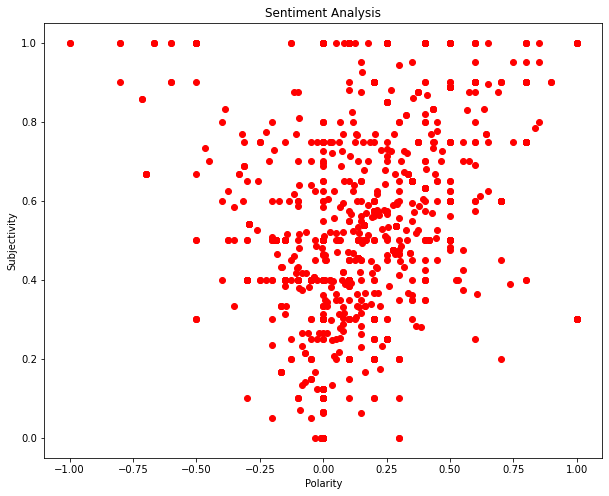

In [20]:
plt.figure(figsize=(10, 8))

for i in range(0, df.shape[0]):
    plt.scatter(df["polarity"][i], df["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

### Scatter plots with 3 different classes->  positive and negetive and neutral

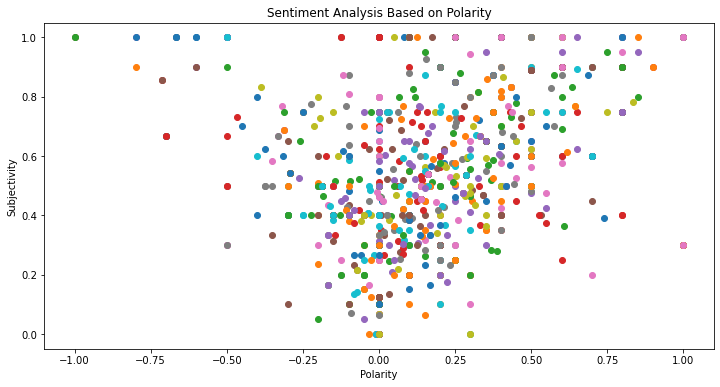

In [25]:
plt.figure(figsize=(12, 6))
for i in range(0, df.shape[0]):
    plt.scatter(df["polarity"][i], df["subjectivity"][i],cmap=df['analysis'])


plt.title("Sentiment Analysis Based on Polarity") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing

In [26]:
df["analysis"].value_counts()

Neutral     986
Positive    792
Negative    221
Name: analysis, dtype: int64

<AxesSubplot:>

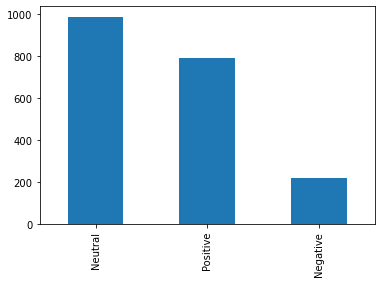

In [38]:
df["analysis"].value_counts().plot(kind="bar")

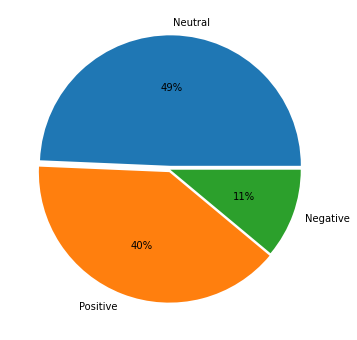

In [39]:
plt.figure(figsize=(10,6))
plt.pie(x=df["analysis"].value_counts(),explode=[0.03,0.02,0.0],labels=["Neutral","Positive","Negative"],autopct='%1.0f%%')
plt.show()

## Observations

###  pie plot shows 3 different classes:
### 1. he tweeted neutral tweets of about 49%  times  
### 2. he tweeted positive tweets of about 40%  times
### 3. he tweeted negetive tweets of about 11%  times


## so we can conclude from his tweets that he is overall positive and neutral minded persons